In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
%matplotlib inline

In [3]:
df = pd.read_excel("Chapter3_Completions_DataSet.xlsx")
df.describe()

,Stage Spacing,Cluster Spacing,Sand per ft (# per ft),Water per ft (gal per ft)
count,144.000000,144.000000,144.000000,144.000000
mean,197.908333,39.713194,2949.275000,57.986111
std,28.411963,5.702597,1414.559452,37.618435
min,146.200000,26.000000,798.000000,5.000000
25%,173.400000,36.400000,1197.000000,15.000000
50%,193.800000,39.000000,3351.600000,65.000000
75%,217.600000,42.900000,4069.800000,90.000000
max,268.600000,57.200000,5506.200000,125.000000


In [4]:
# standarize the data
from sklearn.preprocessing import StandardScaler

In [5]:
scaler = StandardScaler()
scaler.fit(df)
scaled_features = scaler.transform(df)
scaled_features_df = pd.DataFrame(scaled_features,  columns =  ['Stage Spacing',
                          'Cluster Spacing', 'Sand per ft (# per ft)',
                          'water per ft (gal per ft)'])
scaled_features_df.head()

,Stage Spacing,Cluster Spacing,Sand per ft (# per ft),water per ft (gal per ft)
0,-0.865617,1.018309,-1.299677,-1.280053
1,-1.105788,-0.125501,-1.299677,-1.280053
2,-1.345959,0.332023,-1.356287,-1.280053
3,-1.466045,0.103261,-1.243066,-1.280053
4,-0.985703,1.247071,-1.299677,-1.280053


In [6]:
# applt 2 principal components
from sklearn.decomposition import PCA
PCA  = PCA(n_components=2)
PCA.fit(scaled_features_df)
Transformed_PCA= PCA.transform(scaled_features_df)
Transformed_PCA

array([[-2.20401503,  0.49230415],
       [-2.01847823, -0.65257072],
       [-2.3001967 , -0.3263588 ],
       [-2.23481144, -0.5804819 ],
       [-2.32844843,  0.65610591],
       [-2.01570154,  1.4935046 ],
       [-2.37840516,  0.05716489],
       [-2.17148144,  0.23678942],
       [-2.26829929, -1.09568622],
       [-2.12311515, -0.44880128],
       [-2.10815144,  1.05406075],
       [-2.26338126,  0.14507647],
       [-2.15628491, -0.70709925],
       [-2.56671864, -0.94403556],
       [-2.14337646,  1.8671572 ],
       [-2.20456595,  2.68214851],
       [-2.14710823,  1.48793811],
       [-2.12858409,  0.50028039],
       [-1.84194759,  1.41483116],
       [-2.2819054 ,  1.13273419],
       [-1.85627512,  0.42578182],
       [-2.1444168 ,  0.93035638],
       [-2.7093581 ,  0.46433027],
       [-1.75505189,  0.09969964],
       [-2.16482624,  0.14925134],
       [-1.89039914, -0.60323518],
       [-1.9877679 ,  0.25413354],
       [-2.10878761,  0.54024806],
       [-2.07958163,

The "transformed PCA" show the two principal components in a numpy array.

Text(0, 0.5, 'Second Principal Component')

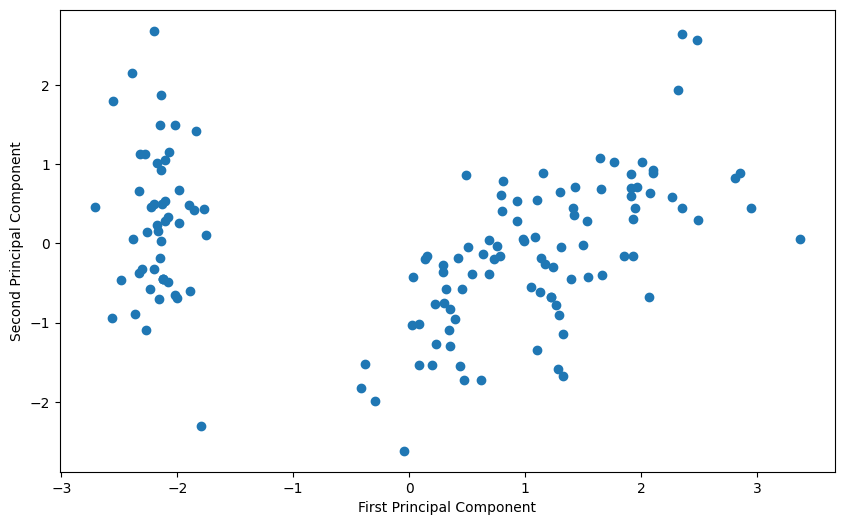

In [7]:
plt.figure(figsize=(10,6))
plt.scatter(Transformed_PCA[:,0], Transformed_PCA[:,1])
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')

In [8]:
# get the eigenvectors of each principal component
# thes sores provide an insight on the variable for the variable
# that have the largest impact on each of the generated two principal components
# and can range between -1 and 1, with -1 and 1 indicating the largest influence
# on the components
df_components = pd.DataFrame(PCA.components_, columns=['Stage Spacing',
                                              'Cluster Spacing',
                                              'Sand per ft (# per ft)',
                                              'Water per ft (gal)'
                                            ])

df_components

,Stage Spacing,Cluster Spacing,Sand per ft (# per ft),Water per ft (gal)
0,0.519427,-0.271276,0.580313,0.565545
1,0.387659,0.919532,0.024583,0.059802


<Axes: >

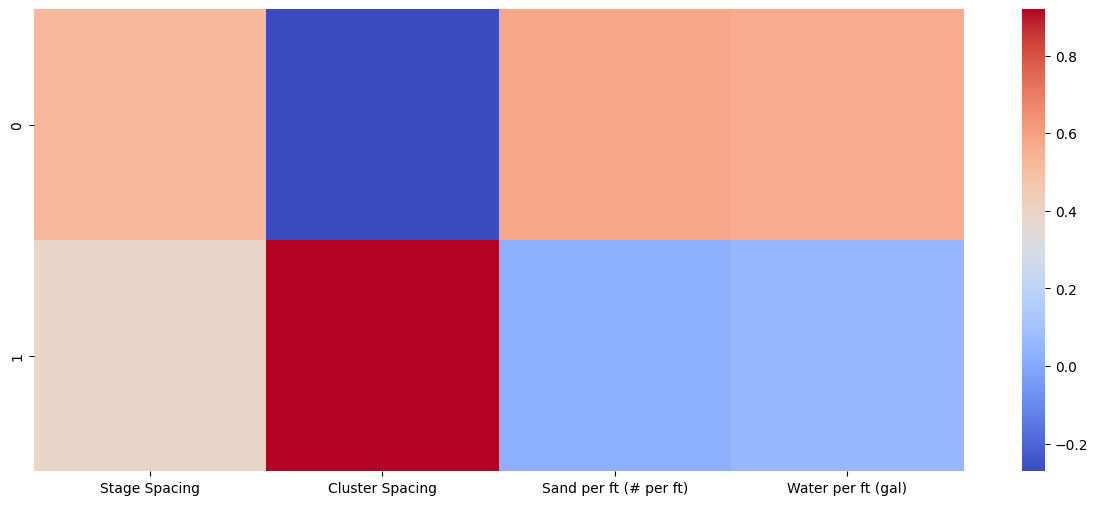

In [9]:
plt.figure(figsize=(15,6))
sns.heatmap(df_components, cmap='coolwarm')

The goal of PCA is to understand sensitivityof a particular variable on the output of a ML model in a regression or a classification scenario, it is important to keep those features that are going to be used for sensitivity analysis.

In [10]:
# export the 2 principal components created in a csv
# transform numpy array into a df
transformed_PCA = pd.DataFrame(Transformed_PCA, columns=['First Principal Component',
                                    'Second Principal Component'])
transformed_PCA.to_csv('two_principal_components.csv')